## Forecasting for Apple Inc. stock market data

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [7]:
#!pip install pandas_datareader

In [3]:
import pandas_datareader as pdr

key = 'a4a6ef1a3db80f8b30de12de4f54035aff1d6914'
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [5]:
df.head()

close    high     low    open    volume  \
symbol date                                                                  
AAPL   2017-05-12 00:00:00+00:00  156.10  156.42  154.67  154.70  32221756   
       2017-05-15 00:00:00+00:00  155.70  156.65  155.05  156.01  25700983   
       2017-05-16 00:00:00+00:00  155.47  156.06  154.72  155.94  19904679   
       2017-05-17 00:00:00+00:00  150.25  154.57  149.71  153.60  49482818   
       2017-05-18 00:00:00+00:00  152.54  153.34  151.13  151.27  33159664   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2017-05-12 00:00:00+00:00  36.936941  37.012661  36.598569  36.605668   
       2017-05-15 00:00:00+00:00  36.842292  37.067084  36.688486  36.915645   
       2017-05-16 00:00:00+00:00  36.787868  36.927476  36.610400  36.899081   
       2017-05-17 00:00:00+00:00  35.552693  36.574907  35.424916  36.345382   
       2017-05-18 00:00:00+00:00  36.094561  36.283860  35.760922  35.794049   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2017-05-12 00:00:00+00:00  128887024      0.0          1.0  
       2017-05-15 00:00:00+00:00  102803932      0.0          1.0  
       2017-05-16 00:00:00+00:00   79618716      0.0          1.0  
       2017-05-17 00:00:00+00:00  197931272      0.0          1.0  
       2017-05-18 00:00:00+00:00  132638656      0.0          1.0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1258 entries, ('AAPL', Timestamp('2017-05-12 00:00:00+0000', tz='UTC')) to ('AAPL', Timestamp('2022-05-10 00:00:00+0000', tz='UTC'))
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   close        1258 non-null   float64
 1   high         1258 non-null   float64
 2   low          1258 non-null   float64
 3   open         1258 non-null   float64
 4   volume       1258 non-null   int64  
 5   adjClose     1258 non-null   float64
 6   adjHigh      1258 non-null   float64
 7   adjLow       1258 non-null   float64
 8   adjOpen      1258 non-null   float64
 9   adjVolume    1258 non-null   int64  
 10  divCash      1258 non-null   float64
 11  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 164.0+ KB


In [9]:
df.shape

(1258, 12)

In [10]:
df.to_csv('AAPL.csv')

In [12]:
df = pd.read_csv('AAPL.csv')
df.head(10)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-05-12 00:00:00+00:00,156.10,156.42,154.67,154.70,32221756,36.936941,37.012661,36.598569,36.605668,128887024,0.0,1.0
1,AAPL,2017-05-15 00:00:00+00:00,155.70,156.65,155.05,156.01,25700983,36.842292,37.067084,36.688486,36.915645,102803932,0.0,1.0
2,AAPL,2017-05-16 00:00:00+00:00,155.47,156.06,154.72,155.94,19904679,36.787868,36.927476,36.610400,36.899081,79618716,0.0,1.0
3,AAPL,2017-05-17 00:00:00+00:00,150.25,154.57,149.71,153.60,49482818,35.552693,36.574907,35.424916,36.345382,197931272,0.0,1.0
4,AAPL,2017-05-18 00:00:00+00:00,152.54,153.34,151.13,151.27,33159664,36.094561,36.283860,35.760922,35.794049,132638656,0.0,1.0
5,AAPL,2017-05-19 00:00:00+00:00,153.06,153.98,152.63,153.38,26733798,36.217605,36.435299,36.115857,36.293325,106935192,0.0,1.0
6,AAPL,2017-05-22 00:00:00+00:00,153.99,154.58,152.91,154.00,22340069,36.437665,36.577273,36.182112,36.440031,89360276,0.0,1.0
7,AAPL,2017-05-23 00:00:00+00:00,153.80,154.90,153.31,154.90,19430358,36.392707,36.652993,36.276761,36.652993,77721432,0.0,1.0
8,AAPL,2017-05-24 00:00:00+00:00,153.34,154.17,152.67,153.84,19118319,36.283860,36.480257,36.125322,36.402172,76473276,0.0,1.0
9,AAPL,2017-05-25 00:00:00+00:00,153.87,154.35,153.03,153.73,19044463,36.409270,36.522850,36.210507,36.376143,76177852,0.0,1.0


In [18]:
df.tail()  # data available until 2022/05/10

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2022-05-04 00:00:00+00:00,166.02,166.48,159.26,159.670,107521649,165.777573,166.236902,159.027445,159.436846,107521649,0.00,1.0
1254,AAPL,2022-05-05 00:00:00+00:00,156.77,164.08,154.95,163.850,130525275,156.541081,163.840406,154.723738,163.610742,130525275,0.00,1.0
1255,AAPL,2022-05-06 00:00:00+00:00,157.28,159.44,154.18,156.010,116124647,157.280000,159.440000,154.180000,156.010000,116124647,0.23,1.0
1256,AAPL,2022-05-09 00:00:00+00:00,152.06,155.83,151.49,154.925,131577921,152.060000,155.830000,151.490000,154.925000,131577921,0.00,1.0
1257,AAPL,2022-05-10 00:00:00+00:00,154.51,156.74,152.93,155.520,115366736,154.510000,156.740000,152.930000,155.520000,115366736,0.00,1.0


In [13]:
df.shape

(1258, 14)

In [27]:
len(df['date'].unique())

1258

In [17]:
df.isnull().values.any() # no null values

False

In [22]:
df1 = df['close'] # let's take 'close' to predict
df1.head(10)

0    156.10
1    155.70
2    155.47
3    150.25
4    152.54
5    153.06
6    153.99
7    153.80
8    153.34
9    153.87
Name: close, dtype: float64

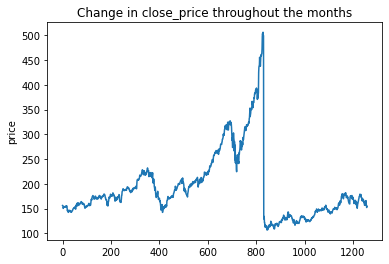

In [36]:
plt.plot(df1)
plt.title('Change in close_price throughout the months')
plt.ylabel('price')
plt.show()